This notebook will be used to import the results from the ZooScatR model simulations.

## Import important stuff

In [2]:
import os
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import array as arr
%matplotlib inline

In [3]:
sns.set_theme(style="darkgrid")
sns.color_palette("viridis", as_cmap=True)

# Read data
Read in the data from the simulations run in R with ZooScatR. A script including the simulations can be found in sim_Muriel.Rmd.

In [4]:
simulations = pd.read_feather('../ZooScatStuff/my_data.feather')
# Add a row for sigma_bs
simulations['sigbs'] = 10**(simulations.TS/10)

### Plot cross sectional backscatter data

Text(0.5, 0, 'Frequency (kHz)')

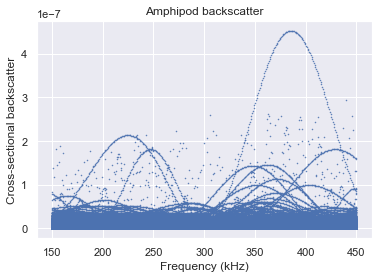

In [5]:
plt.plot(simulations.freq[simulations['spec']=='Amphipod'],simulations.sigbs[simulations['spec']=='Amphipod'],'.', markersize=1)                                                                                                                              
plt.title('Amphipod backscatter')
plt.ylabel('Cross-sectional backscatter')
plt.xlabel('Frequency (kHz)')

Text(0.5, 0, 'Frequency (kHz)')

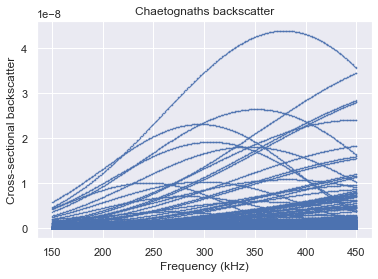

In [6]:
plt.plot(simulations.freq[simulations['spec']=='Chaetognaths'],simulations.sigbs[simulations['spec']=='Chaetognaths'],'.', markersize=1)                                                                                                                              
plt.title('Chaetognaths backscatter')
plt.ylabel('Cross-sectional backscatter')
plt.xlabel('Frequency (kHz)')

Text(0.5, 0, 'Frequency (kHz)')

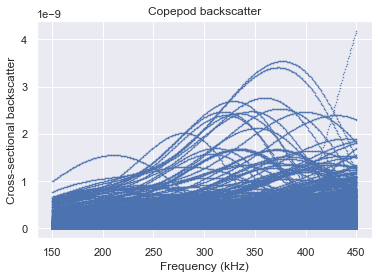

In [7]:
plt.plot(simulations.freq[simulations['spec']=='Copepod'],simulations.sigbs[simulations['spec']=='Copepod'],'.', markersize=1)                                                                                                                              
plt.title('Copepod backscatter')
plt.ylabel('Cross-sectional backscatter')
plt.xlabel('Frequency (kHz)')

Text(0.5, 0, 'Frequency (kHz)')

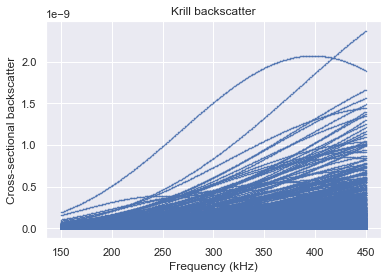

In [8]:
plt.plot(simulations.freq[simulations['spec']=='Krill'],simulations.sigbs[simulations['spec']=='Krill'],'.', markersize=1)                                                                                                                              
plt.title('Krill backscatter')
plt.ylabel('Cross-sectional backscatter')
plt.xlabel('Frequency (kHz)')

Text(0.5, 0, 'Frequency (kHz)')

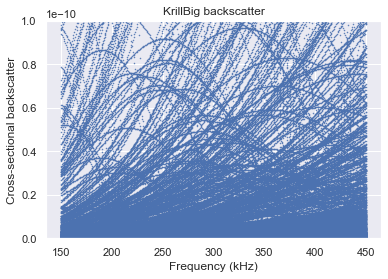

In [15]:
plt.plot(simulations.freq[simulations['spec']=='KrillBig'],simulations.sigbs[simulations['spec']=='KrillBig'],'.', markersize=1)   
plt.ylim([0.0*10**-8,0.01*10**-8])
plt.title('KrillBig backscatter')
plt.ylabel('Cross-sectional backscatter')
plt.xlabel('Frequency (kHz)')

# Organize $\sigma_{bs}$ 
Calculate the mean $\sigma_{bs}$  at each frequency interval for each species

In [9]:
simulations_min = simulations.groupby(["spec","freq"]).agg({'sigbs':'min'})
simulations_max = simulations.groupby(["spec","freq"]).agg({'sigbs':'max'})
simulations_mean = simulations.groupby(["spec","freq"]).agg({'sigbs':'mean'})

In the linear form ($\sigma_{bs}$) the dispersion of data are not at all following a normal distribution around the mean. In this case we can use he standard deviation and dispersion internals to summarize the spread of the data. We will call it the disersion range (Greenacre 2016). I am using the 95% confidence interval. (z-score*std = 1.95*std for 95%). I am using this metric to describe the spread of the data, not the confidence in the mean.

* consider using a squewed calculation for confidence interval for this data
Doing it. Will use scipy.stats.tstd to apply a lower or upper limit (the mean) to trim te sample standard deviation

*Calculating the standard below and above the mean for different dispertion interval*

In [11]:
mean_bs = simulations_mean.reset_index('freq')
min_bs = simulations_min.reset_index('freq')
max_bs = simulations_max.reset_index('freq')


In the linear form ($\sigma_{bs}$) the dispersion of data are not at all following a normal distribution around the mean. In this case we can use he standard deviation and dispersion internals to summarize the spread of the data. We will call it the disersion range (Greenacre 2016). I am using the 95% confidence interval. (z-score*std = 1.95*std for 95%). I am using this metric to describe the spread of the data, not the confidence in the mean.

* consider using a squewed calculation for confidence interval for this data
Doing it. Will use scipy.stats.tstd to apply a lower or upper limit (the mean) to trim te sample standard deviation

## Plot 
I will plot the backscattering cross-section of each functional group.

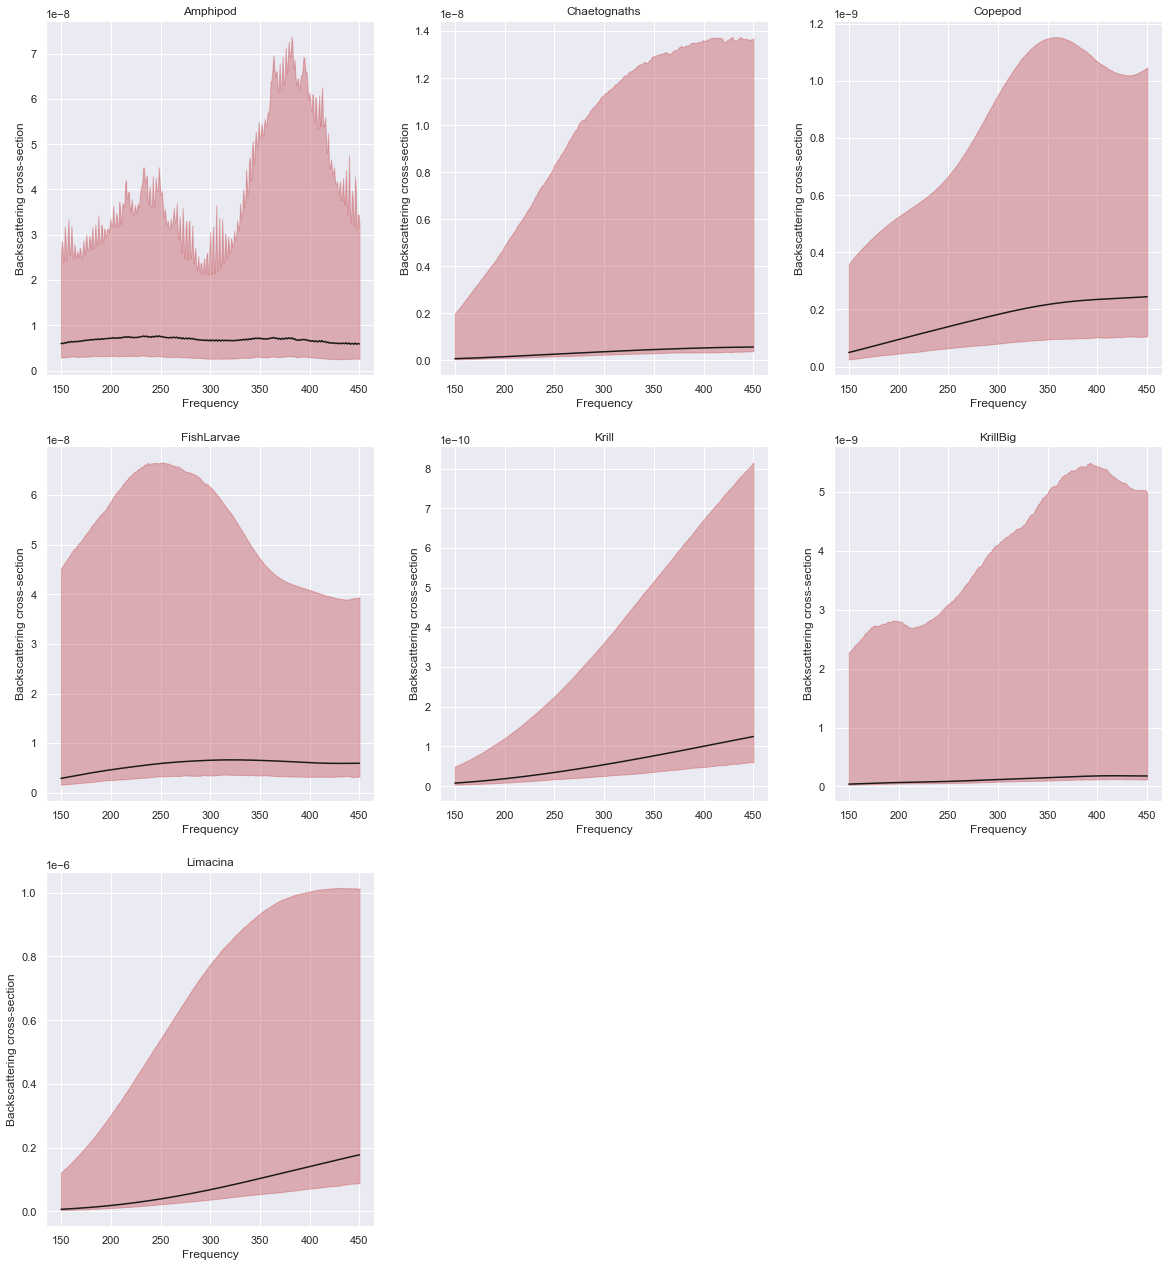

In [12]:
fig=plt.figure(figsize=(20, 30),facecolor='w', edgecolor='k')

for ind in range(0,len(mean_bs.index.unique())):
    
    spec = mean_bs.index.unique()[ind]
    freq = mean_bs.loc[spec].to_numpy()[:,0]
    sigbs = mean_bs.loc[spec].to_numpy()[:,1]
    spec_bool = simulations['spec']==spec
    # Calculate the standard deviation above and below the mean for each frequency and species
    std_below = np.zeros(len(freq))
    std_above = np.zeros(len(freq))

    for ind_f in range(0,len(freq)):
        freq_bool = simulations['freq']==freq[ind_f]
        spec_freq = np.logical_and(freq_bool.to_numpy(), spec_bool.to_numpy())
        std_below[ind_f] = stats.tstd(simulations.sigbs[spec_freq].to_numpy(),limits=(None,sigbs[ind_f]))
        std_above[ind_f] = stats.tstd(simulations.sigbs[spec_freq],limits=(sigbs[ind_f],None))

    ci_95_below = std_below*1.96 # z-score for 95% CI
    ci_95_above = std_above*1.96 # z-score for 95% CI
    sigbsmin = min_bs.loc[spec].to_numpy()[:,1]
    sigbsmax = max_bs.loc[spec].to_numpy()[:,1]
    
    ax=plt.subplot(431+ind)
    ax.plot(freq,sigbs,'k')
    #ax.plot(freq,sigbsmin,'g')
    #ax.plot(freq,sigbsmax,'r')
    plt.fill_between(freq, sigbs-ci_95_below, sigbs+ci_95_above, color='r', alpha=0.4)
    ax.set_title(spec)
    ax.set_ylabel('Backscattering cross-section')
    ax.set_xlabel('Frequency')


# Organize TS
Calculate the mean $TS$  at each frequency interval for each species

In [13]:
simulationsTS_min = simulations.groupby(["spec","freq"]).agg({'TS':'min'})
simulationsTS_max = simulations.groupby(["spec","freq"]).agg({'TS':'max'})
simulationsTS_mean = simulations.groupby(["spec","freq"]).agg({'TS':'mean'})
simulationsTS_std = simulations.groupby(["spec","freq"]).agg({'TS':'std'})

In [14]:
mean_ts = simulationsTS_mean.reset_index('freq')
std_ts = simulationsTS_std.reset_index('freq')
min_ts = simulationsTS_min.reset_index('freq')
max_ts = simulationsTS_max.reset_index('freq')

In the log form (TS) the dispersion of data are approximately normal around the mean. In this case we can use he standard deviation and confidence internals to summarize the spread of the data. I am using the 95% confidence interval. (z-score*std = 1.95*std for 95%)

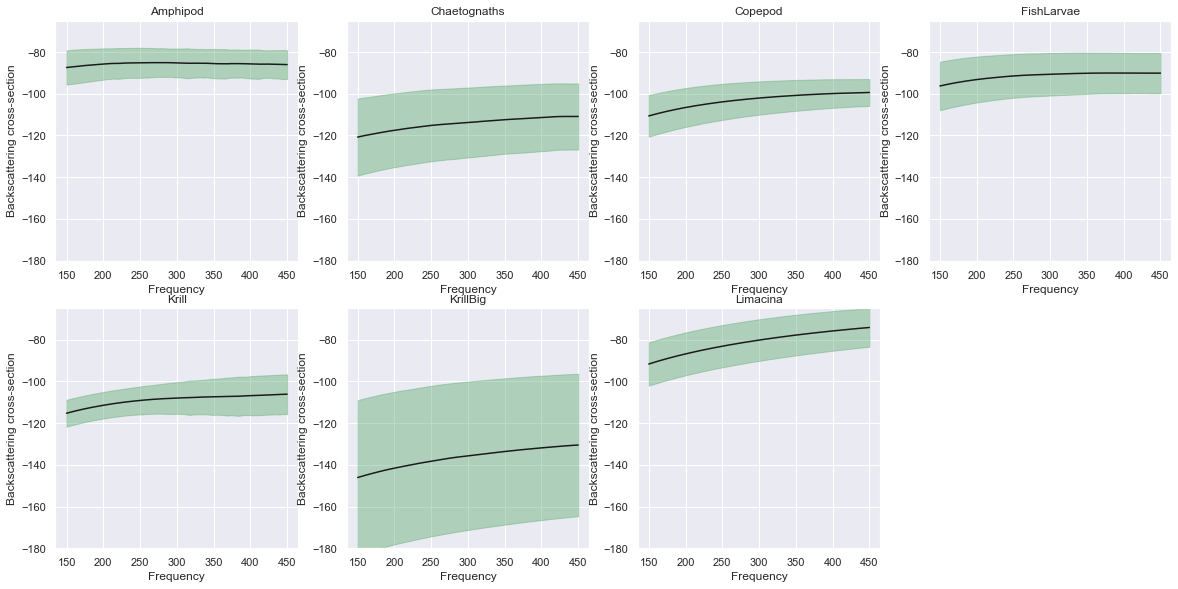

In [15]:
fig=plt.figure(figsize=(20, 15),facecolor='w', edgecolor='k')

for ind in range(0,len(mean_bs.index.unique())):
    
    spec = mean_ts.index.unique()[ind]
    freq = mean_ts.loc[spec].to_numpy()[:,0]
    ts = mean_ts.loc[spec].to_numpy()[:,1]
    std = std_ts.loc[spec].to_numpy()[:,1]
    ci_95 = std*1.96 # z-score for 95% CI
    tsmin = min_ts.loc[spec].to_numpy()[:,1]
    tsmax = max_ts.loc[spec].to_numpy()[:,1]
    
    ax=plt.subplot(341+ind)
    ax.plot(freq,ts,'k')
    #ax.plot(freq,tsmin,'g')
    #ax.plot(freq,tsmax,'r')
    ax.set_ylim(-180,-65)
    plt.fill_between(freq, ts-std, ts+std, color='g', alpha=0.4)
    ax.set_title(spec)
    ax.set_ylabel('Backscattering cross-section')
    ax.set_xlabel('Frequency')

## Make matrix

In [18]:
print(simulations)

                 TS    freq         L        la         g         h  \
0       -114.996764  150.00  1.316266  2.469293  1.024078  1.023217   
1       -114.916949  150.75  1.316266  2.469293  1.024078  1.023217   
2       -114.837599  151.50  1.316266  2.469293  1.024078  1.023217   
3       -114.758709  152.25  1.316266  2.469293  1.024078  1.023217   
4       -114.680276  153.00  1.316266  2.469293  1.024078  1.023217   
...             ...     ...       ...       ...       ...       ...   
2806995  -88.148582  447.00  2.169428  8.877395  1.025626  0.763537   
2806996  -88.123760  447.75  2.169428  8.877395  1.025626  0.763537   
2806997  -88.098995  448.50  2.169428  8.877395  1.025626  0.763537   
2806998  -88.074286  449.25  2.169428  8.877395  1.025626  0.763537   
2806999  -88.049634  450.00  2.169428  8.877395  1.025626  0.763537   

            orient        spec         sigbs  
0        93.067818     Copepod  3.164635e-12  
1        93.067818     Copepod  3.223332e-12  
2     

In [50]:
simulations['spec'].unique()[1]

'Krill'

In [54]:
freqs = simulations['freq'].unique()
freqs



array([150.  , 150.75, 151.5 , 152.25, 153.  , 153.75, 154.5 , 155.25,
       156.  , 156.75, 157.5 , 158.25, 159.  , 159.75, 160.5 , 161.25,
       162.  , 162.75, 163.5 , 164.25, 165.  , 165.75, 166.5 , 167.25,
       168.  , 168.75, 169.5 , 170.25, 171.  , 171.75, 172.5 , 173.25,
       174.  , 174.75, 175.5 , 176.25, 177.  , 177.75, 178.5 , 179.25,
       180.  , 180.75, 181.5 , 182.25, 183.  , 183.75, 184.5 , 185.25,
       186.  , 186.75, 187.5 , 188.25, 189.  , 189.75, 190.5 , 191.25,
       192.  , 192.75, 193.5 , 194.25, 195.  , 195.75, 196.5 , 197.25,
       198.  , 198.75, 199.5 , 200.25, 201.  , 201.75, 202.5 , 203.25,
       204.  , 204.75, 205.5 , 206.25, 207.  , 207.75, 208.5 , 209.25,
       210.  , 210.75, 211.5 , 212.25, 213.  , 213.75, 214.5 , 215.25,
       216.  , 216.75, 217.5 , 218.25, 219.  , 219.75, 220.5 , 221.25,
       222.  , 222.75, 223.5 , 224.25, 225.  , 225.75, 226.5 , 227.25,
       228.  , 228.75, 229.5 , 230.25, 231.  , 231.75, 232.5 , 233.25,
      

In [62]:
sim_all[:,0,0]

array([3.16463458e-12, 3.22333220e-12, 3.28276729e-12, 3.34294385e-12,
       3.40386588e-12, 3.46553733e-12, 3.52796211e-12, 3.59114410e-12,
       3.65508714e-12, 3.71979503e-12, 3.78527152e-12, 3.85152034e-12,
       3.91854516e-12, 3.98634961e-12, 4.05493730e-12, 4.12431177e-12,
       4.19447654e-12, 4.26543507e-12, 4.33719078e-12, 4.40974706e-12,
       4.48310722e-12, 4.55727457e-12, 4.63225234e-12, 4.70804373e-12,
       4.78465188e-12, 4.86207990e-12, 4.94033083e-12, 5.01940769e-12,
       5.09931343e-12, 5.18005096e-12, 5.26162312e-12, 5.34403274e-12,
       5.42728256e-12, 5.51137529e-12, 5.59631358e-12, 5.68210003e-12,
       5.76873719e-12, 5.85622756e-12, 5.94457358e-12, 6.03377764e-12,
       6.12384207e-12, 6.21476916e-12, 6.30656112e-12, 6.39922013e-12,
       6.49274830e-12, 6.58714769e-12, 6.68242030e-12, 6.77856808e-12,
       6.87559291e-12, 6.97349663e-12, 7.07228100e-12, 7.17194774e-12,
       7.27249850e-12, 7.37393488e-12, 7.47625842e-12, 7.57947059e-12,
      